In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

**Task 1: Read the dataset and do data pre-processing**

In [ ]:
df = pd.read_csv('/content/drug200.csv')
df.head()

In [ ]:
df

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,DrugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,DrugY
...,...,...,...,...,...,...
195,56,F,LOW,HIGH,11.567,drugC
196,16,M,LOW,HIGH,12.006,drugC
197,52,M,NORMAL,HIGH,9.894,drugX
198,23,M,NORMAL,NORMAL,14.020,drugX


In [ ]:
df.isnull().sum()

Age            0
Sex            0
BP             0
Cholesterol    0
Na_to_K        0
Drug           0
dtype: int64

In [ ]:
df['Sex'].unique()

array(['F', 'M'], dtype=object)

In [ ]:
df['BP'].unique()

array(['HIGH', 'LOW', 'NORMAL'], dtype=object)

In [ ]:
df['Cholesterol'].unique()

array(['HIGH', 'NORMAL'], dtype=object)

In [ ]:
df['Drug'].unique()

array(['DrugY', 'drugC', 'drugX', 'drugA', 'drugB'], dtype=object)

In [ ]:
df['Drug'].value_counts()

DrugY    91
drugX    54
drugA    23
drugC    16
drugB    16
Name: Drug, dtype: int64

In [ ]:
# Check for outliers

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          200 non-null    int64  
 1   Sex          200 non-null    object 
 2   BP           200 non-null    object 
 3   Cholesterol  200 non-null    object 
 4   Na_to_K      200 non-null    float64
 5   Drug         200 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 9.5+ KB


<Axes: >

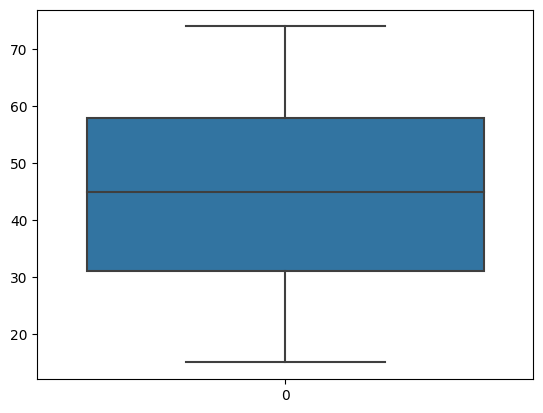

In [ ]:
sns.boxplot(df.Age)

<Axes: >

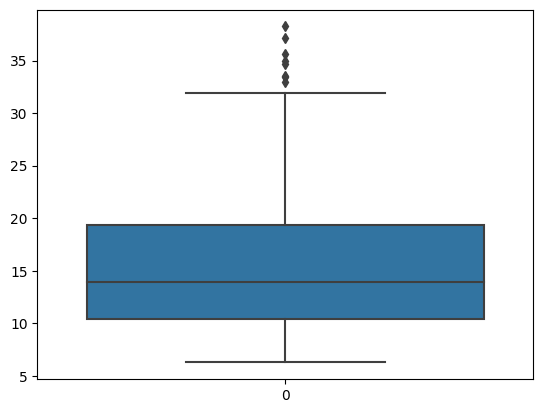

In [ ]:
sns.boxplot(df.Na_to_K)

In [ ]:
# Here, we observed that the column 'Na_to_K' has outliers.

# So, we will replace these outliers with the Median value.

In [ ]:
q1 = df.Na_to_K.quantile(.25)
q3 = df.Na_to_K.quantile(.75)
q1, q3

(10.4455, 19.38)

In [ ]:
iqr = q3 - q1
iqr

8.9345

In [ ]:
upper_limit = q3 + 1.5 * iqr
lower_limit = q1 - 1.5 * iqr

In [ ]:
df.median()

<ipython-input-138-6d467abf240d>:1: FutureWarning: The default value of numeric_only in DataFrame.median is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.median()


Age        45.0000
Na_to_K    13.9365
dtype: float64

In [ ]:
df['Na_to_K'] =np.where(df['Na_to_K']>upper_limit,14,df['Na_to_K'])

<Axes: >

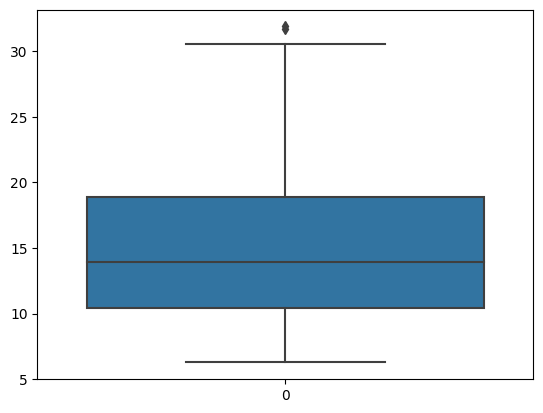

In [ ]:
sns.boxplot(df.Na_to_K)

In [ ]:
# As we can observe, most of the outliers are replaced.

In [ ]:
# Label Encoding

In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
le1 = LabelEncoder()
df['Sex'] = le1.fit_transform(df['Sex'])

In [ ]:
le2 = LabelEncoder()
df['BP'] = le2.fit_transform(df['BP'])

In [ ]:
le3 = LabelEncoder()
df['Cholesterol'] = le3.fit_transform(df['Cholesterol'])

In [ ]:
df.head()

In [ ]:
df.info()

In [ ]:
# Splitting the data

# Step-1: Split dependent and independent
# Step-2: Split training and testing data

In [ ]:
x = df.iloc[:,0:5]
x

In [ ]:
y = df.iloc[:,5:]
y

In [ ]:
# Split training and testing data

from sklearn.model_selection import train_test_split

xtrain, xtest, ytrain, ytest = train_test_split(x,y,test_size=0.2,random_state=21)

In [ ]:
xtrain.shape, xtest.shape, ytrain.shape, ytest.shape

In [ ]:
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical

le = LabelEncoder()
ytrain = le.fit_transform(ytrain)
ytest = le.transform(ytest)

In [ ]:
ytrain

In [ ]:
ytest

In [ ]:
xtrain.shape, xtest.shape, ytrain.shape, ytest.shape

**Task 2: Build the ANN model with (input layer, min 3 hidden layers & output layer)**

In [ ]:
# ANN Model

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [ ]:
model = Sequential()                       # Initialize the seq model

# Adding layers

model.add(Dense(5, activation='relu'))
model.add(Dense(50, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(15, activation='relu'))
model.add(Dense(5, activation='softmax'))   # 5 output neurons as 5 uniques 'Drug' classes.

In [ ]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [ ]:
model.fit(xtrain, ytrain, batch_size=4, epochs=100, validation_data=(xtest,ytest))

**Task 3: Test the model with random data**

In [ ]:
df.head()

In [ ]:
output = ['DrugY','drugA','drugB','drugC','drugX']

In [ ]:
# data = np.array([23, 'F',	'HIGH',	'HIGH',	25.355])  # DrugY -> 0

data = [28, 0, 2, 0, 5]
ypred = model.predict([data])
ypred = np.argmax(ypred)
output[ypred]

In [ ]:
data = [51, 1, 1, 0, 12]
ypred = model.predict([data])
ypred = np.argmax(ypred)
output[ypred]